In [9]:
# Get the data for expeirment
import pandas as pd 
import numpy as np

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist
from numpy.linalg import pinv
from math import sqrt

from sklearn.linear_model import LinearRegression

import Data_utils

from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import r2_score

import plotly.express as px
import TsModel


In [2]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
from keras import layers, models
from keras import ops

device = torch.device("cuda:0")
print(f"Keras version is {keras.__version__}")
print(f"Num GPUs Available: {torch.cuda.device_count()}")
plt.rcParams.update({'font.size': 20})

Keras version is 3.1.1
Num GPUs Available: 1


In [10]:
plot_data = pd.read_csv('Data/processed_ab_no_precp_test.txt')


FileNotFoundError: [Errno 2] No such file or directory: 'Data/processed_ab_no_precp_test.txt'

In [4]:
map_data = plot_data.groupby('name').head(1)

In [ ]:
# Plot the map_data as dot plot 

In [5]:
map_data['RMSE'] = map_data['name'].map(train_prediction_per_stations)

NameError: name 'train_prediction_per_stations' is not defined

In [6]:
map_data

longitude  latitude                     name       id  \
0         -112.82     53.05                  CAMROSE  3011240   
11450     -111.45     52.07       CORONATION CLIMATE  3011887   
22900     -113.58     53.31          EDMONTON INTL A  3012216   
34350     -110.07     53.31             LLOYDMINSTER  3013959   
45800     -114.91     52.42    ROCKY MTN HOUSE (AUT)  3015523   
57250     -112.10     53.51               VEGREVILLE  3016GF0   
68700     -114.11     53.55  EDMONTON STONY PLAIN CS  301A001   
80150     -112.68     51.45          DRUMHELLER EAST  30221LG   
91600     -113.76     52.45            LACOMBE CDA 2  3023722   
103050    -111.85     50.56                   BROOKS  3030QLP   
114500    -114.01     51.12           CALGARY INTL A  3031092   
125950    -113.64     50.00               CLARESHOLM  3031640   
137400    -112.80     49.63               LETHBRIDGE  3033875   
148850    -112.77     49.70           LETHBRIDGE CDA  3033890   
160300    -110.72     50.02             MEDICINE HAT  3034479   
171750    -110.72     50.03         MEDICINE HAT RCS  3034485   
183200    -113.28     51.03          STRATHMORE AGDM  3036205   
194650    -112.05     49.13               MILK RIVER  3044533   
206100    -110.47     49.12              ONEFOUR CDA  3044923   
217550    -115.55     51.19                 BANFF CS  3050519   

                    date  temp  wind_direction  wind_speed  
0       2012-07-10 12:00  28.0            27.0        19.0  
11450   2012-07-10 12:00  29.7            27.0        19.0  
22900   2012-07-10 12:00  28.7            26.0        17.0  
34350   2012-07-10 12:00  29.2            15.0        17.0  
45800   2012-07-10 12:00  26.5            31.0         6.0  
57250   2012-07-10 12:00  29.4            21.0        11.0  
68700   2012-07-10 12:00  27.5            27.0        17.0  
80150   2012-07-10 12:00  32.0            29.0         9.0  
91600   2012-07-10 12:00  28.0            31.0        17.0  
103050  2012-07-10 12:00  31.3            31.0         9.0  
114500  2012-07-10 12:00  28.5            30.0        15.0  
125950  2012-07-10 12:00  27.6             3.0         7.0  
137400  2012-07-10 12:00  27.4            29.0        15.0  
148850  2012-07-10 12:00  27.9            32.0        11.0  
160300  2012-07-10 12:00  31.5            22.0        18.0  
171750  2012-07-10 12:00  32.0            22.0        17.0  
183200  2012-07-10 12:00  28.5            32.0         9.0  
194650  2012-07-10 12:00  29.6            34.0        11.0  
206100  2012-07-10 12:00  29.3            28.0         7.0  
217550  2012-07-10 12:00  26.7            23.0        19.0

In [3]:
# Modified from source: https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(map_data, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="name", 
                        #hover_data=["name", 'RMSE'],
                        text= map_data['name'],
                        #color="Listed",
                        #color_continuous_scale=color_scale,
                        #size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_traces(textposition='bottom center')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'px' is not defined

In [3]:
# Import the data to plot
plot_data = pd.read_csv('Data/exp/9x_test.csv', index_col=0)
plot_data_y = pd.read_csv('Data/exp/9y_test.csv', index_col=0)

In [1]:
plot_data

NameError: name 'plot_data' is not defined

In [5]:
def build_neural_network_model():
    model = models.Sequential()
    #model.add(tf.keras.Input(shape=(2,)))
    model.add(layers.Dense(30, activation=tf.keras.activations.tanh))    
    model.add(layers.Dense(1, activation=tf.keras.activations.relu))    
    return model

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def build_gaussian_process_model():
    # Define the kernel for the Gaussian Process
    kernel = RBF(length_scale=1.0)

    # Create the Gaussian Process model
    model = GaussianProcessRegressor(kernel=kernel)

    return model


In [20]:
# Modified from source: https://adriangb.com/scikeras/refs/heads/master/notebooks/Basic_Usage.html#
def plot_partial_dependence_plot_for_data(x, y, title, model_type):
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if model_type == 'nn':
        title = title + ' for neural network'
        # Neural network
        model = KerasRegressor(build_neural_network_model, loss='mse', metrics=[KerasRegressor.r_squared])
        model.fit(x,y, epochs=50)
    if model_type == 'linear':
        # Linear
        title = title + ' for linear model'
        model = LinearRegression().fit(x, y)
    if model_type == 'ts':
        # TS model
        title = title + ' TS-model'
        model = TsModel.TsModel()
        model.fit(x,y)
        model._estimator_type = "regressor"
        model.dummy_ = "dummy"
        
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.set_title(title)
    features=[0, 1, (0,1)]
    # The dataset has ~480,000 data points, making the PDP prediction grid using the entire dataset makes the 
    # computation too large ~25m, therefore have to subsample here     
    PartialDependenceDisplay.from_estimator(model, x, features, ax=ax) 

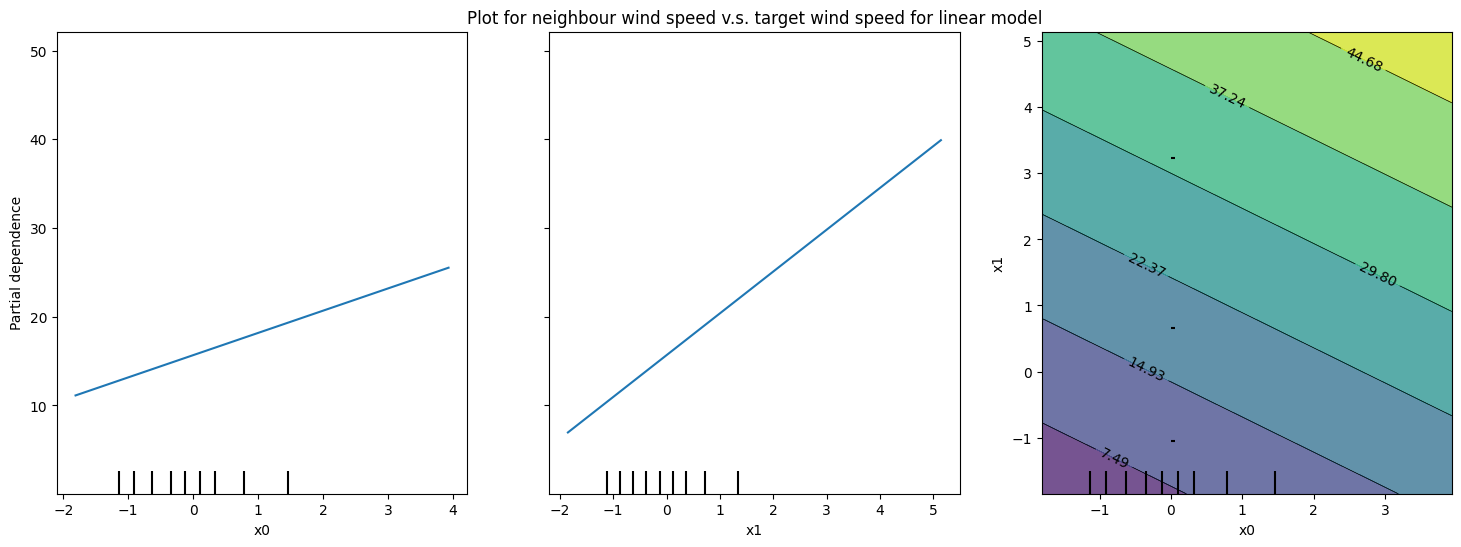

In [23]:
# Code for partial dependency plot
# Modified from source: https://scikit-learn.org/stable/modules/partial_dependence.html
# and source: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py

# Select features to plot
x = plot_data[['4','10']][0:1000]
x = x.rename(columns={'4': 'Neighbour1 wind speed', '10': 'Neighbour2 wind speed'})
y = plot_data_y[0:1000]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind speed v.s. target wind speed", 'linear')


FCM training RMSE: 4.385456312886189


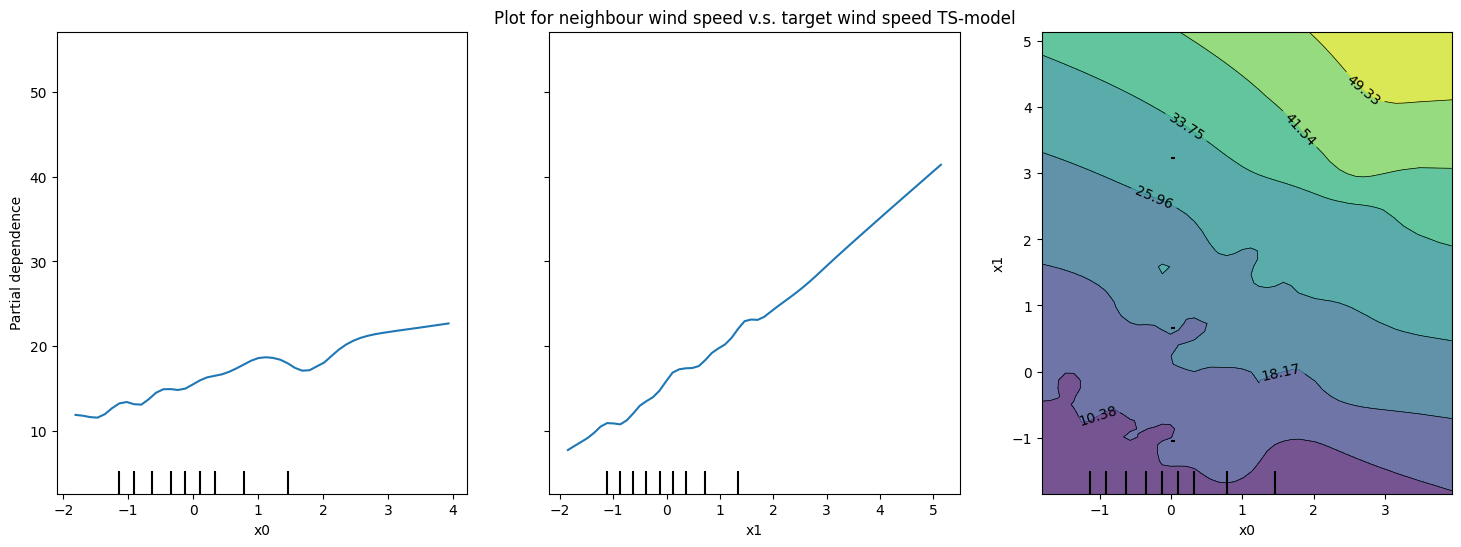

In [24]:
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind speed v.s. target wind speed", 'ts')


Epoch 1/50
32/32 [==============================] - 0s 3ms/step - loss: 291.7449 - r_squared: -4.2621
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 278.1817 - r_squared: -4.0626
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 264.3561 - r_squared: -3.7778
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 249.2330 - r_squared: -3.7884
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 233.8388 - r_squared: -3.2306
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 218.0143 - r_squared: -3.0367
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 202.0990 - r_squared: -2.7627
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 186.6304 - r_squared: -2.3665
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 171.1846 - r_squared: -2.1504
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 156.4708 

32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 675us/step


32/32 [==============================] - 0s 684us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 659us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 692us/step


32/32 [==============================] - 0s 675us/step


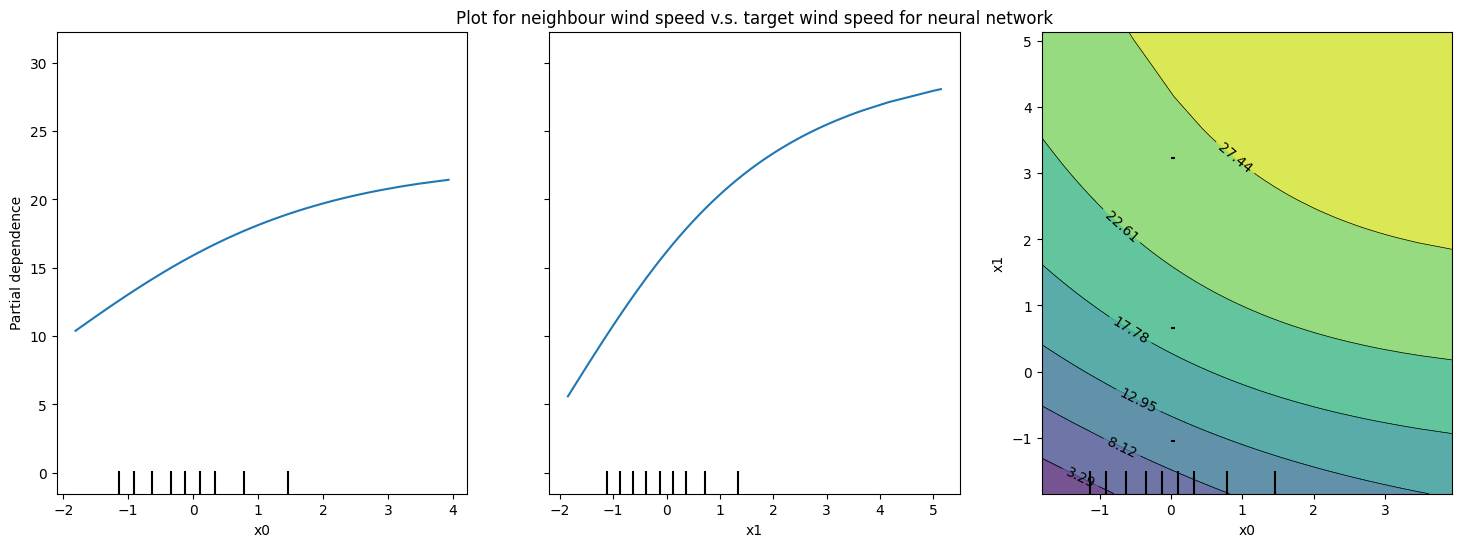

In [25]:
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind speed v.s. target wind speed", 'nn')

FCM training RMSE: 6.327400458604118
Epoch 1/50
32/32 [==============================] - 0s 3ms/step - loss: 294.0186 - r_squared: -4.2648
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 284.4039 - r_squared: -4.1832
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 274.7087 - r_squared: -3.9060
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 264.6848 - r_squared: -3.7407
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 254.8809 - r_squared: -3.6093
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 245.8727 - r_squared: -3.5466
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 237.3427 - r_squared: -3.2385
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 229.4906 - r_squared: -3.2475
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 222.7956 - r_squared: -3.3538
Epoch 10/50
32/32 [==========================

32/32 [==============================] - 0s 678us/step


32/32 [==============================] - 0s 1ms/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 744us/step


32/32 [==============================] - 0s 643us/step


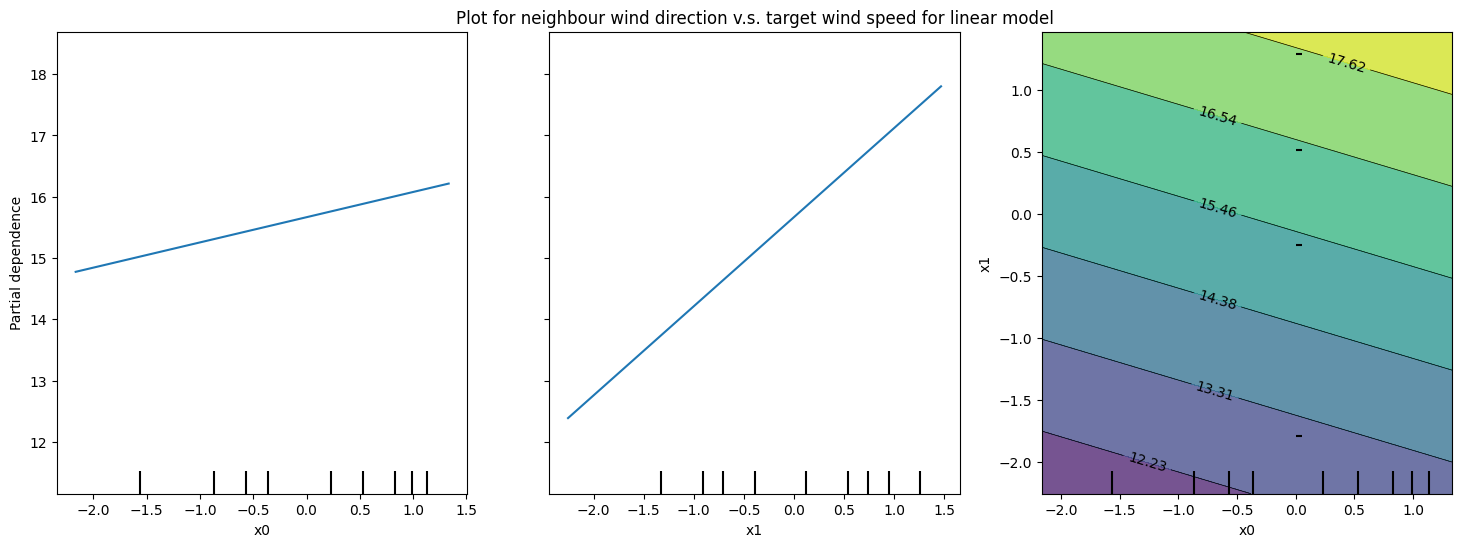

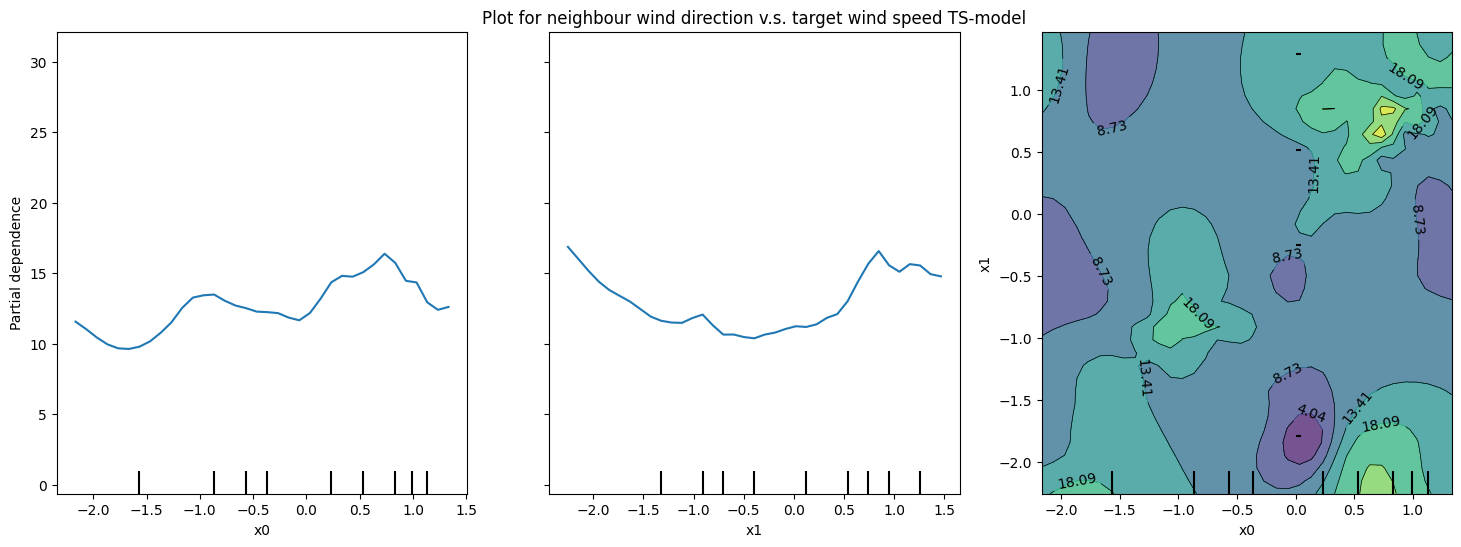

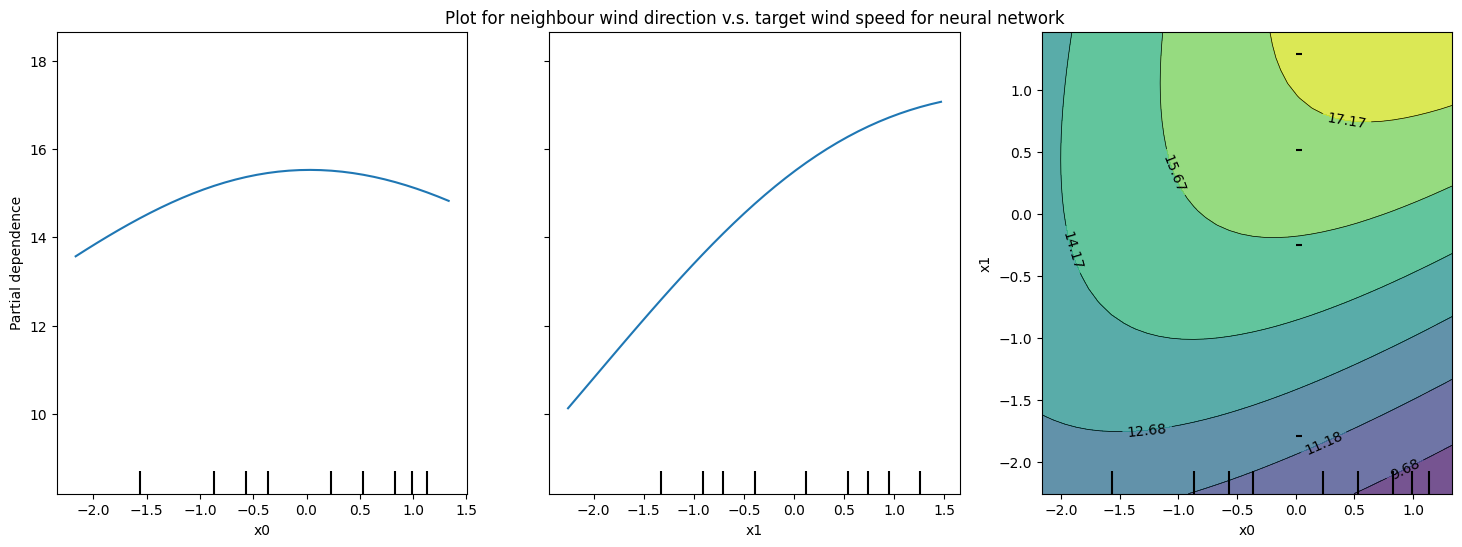

In [26]:
# Plot wind direction vs wnd speed
# Select features to plot
x = plot_data[['3','9']][0:1000]
x = x.rename(columns={'3': 'Neighbour1 wind direction', '9': 'Neighbour2 wind direction'})
y= plot_data_y[0:1000]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind direction v.s. target wind speed", 'linear')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind direction v.s. target wind speed", 'ts')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind direction v.s. target wind speed", 'nn')

FCM training RMSE: 7.181704022001154
Epoch 1/50
32/32 [==============================] - 0s 5ms/step - loss: 299.6890 - r_squared: -4.4149
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 289.0378 - r_squared: -4.0677
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 278.3816 - r_squared: -3.9865
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 266.9866 - r_squared: -3.7498
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 255.8432 - r_squared: -3.6114
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 244.9338 - r_squared: -3.3053
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 234.2551 - r_squared: -3.1431
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 224.2076 - r_squared: -3.0011
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 215.1026 - r_squared: -2.8556
Epoch 10/50
32/32 [==========================

32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 707us/step


32/32 [==============================] - 0s 965us/step


32/32 [==============================] - 0s 664us/step


32/32 [==============================] - 0s 677us/step


32/32 [==============================] - 0s 677us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 836us/step


32/32 [==============================] - 0s 662us/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 706us/step


32/32 [==============================] - 0s 868us/step


32/32 [==============================] - 0s 708us/step


32/32 [==============================] - 0s 648us/step


32/32 [==============================] - 0s 667us/step


32/32 [==============================] - 0s 645us/step


32/32 [==============================] - 0s 664us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 726us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 682us/step


32/32 [==============================] - 0s 709us/step


32/32 [==============================] - 0s 675us/step


32/32 [==============================] - 0s 705us/step


32/32 [==============================] - 0s 739us/step


32/32 [==============================] - 0s 675us/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 688us/step


32/32 [==============================] - 0s 708us/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 707us/step


32/32 [==============================] - 0s 897us/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 676us/step


32/32 [==============================] - 0s 688us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 772us/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 643us/step


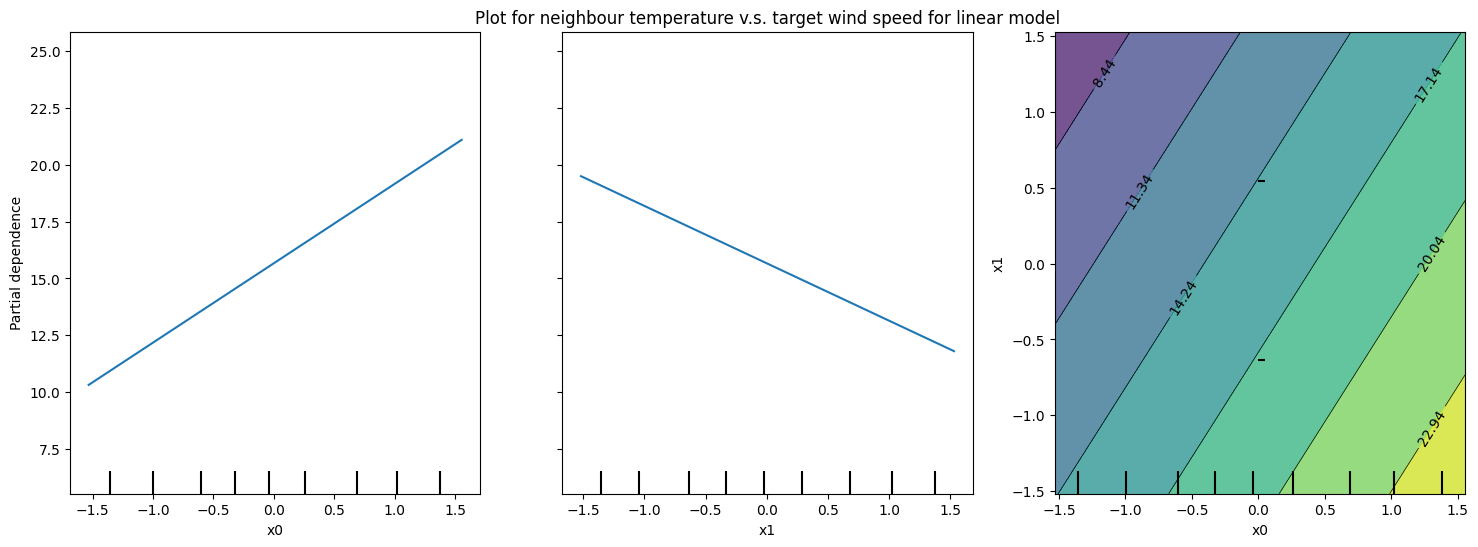

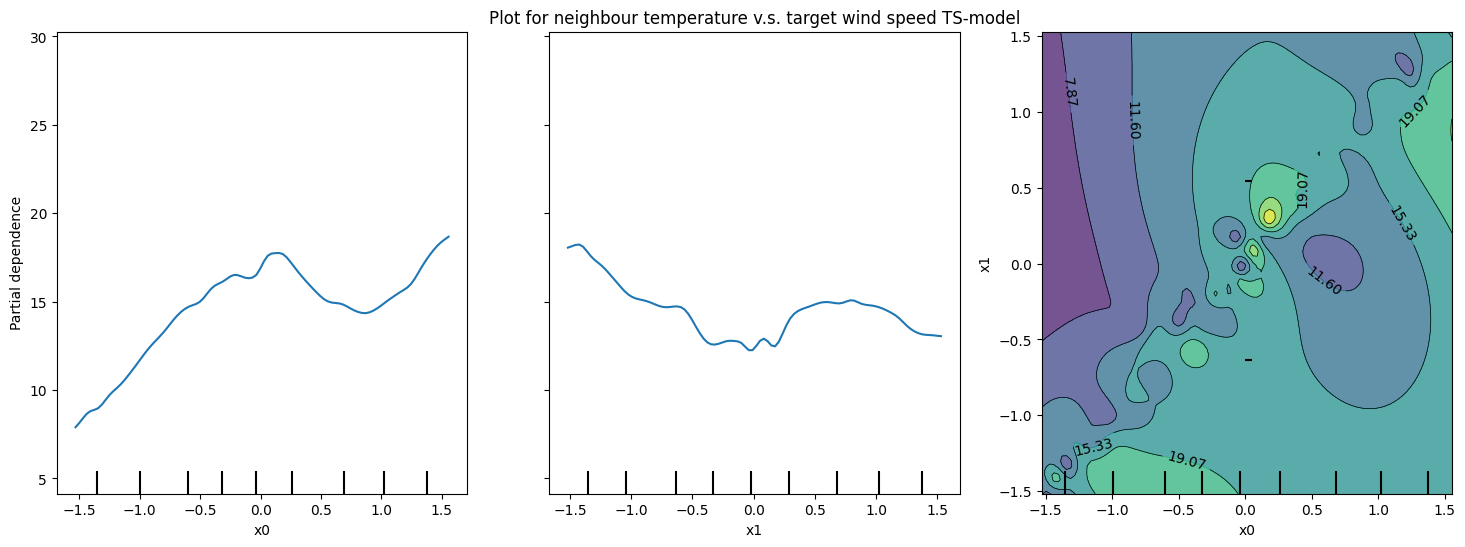

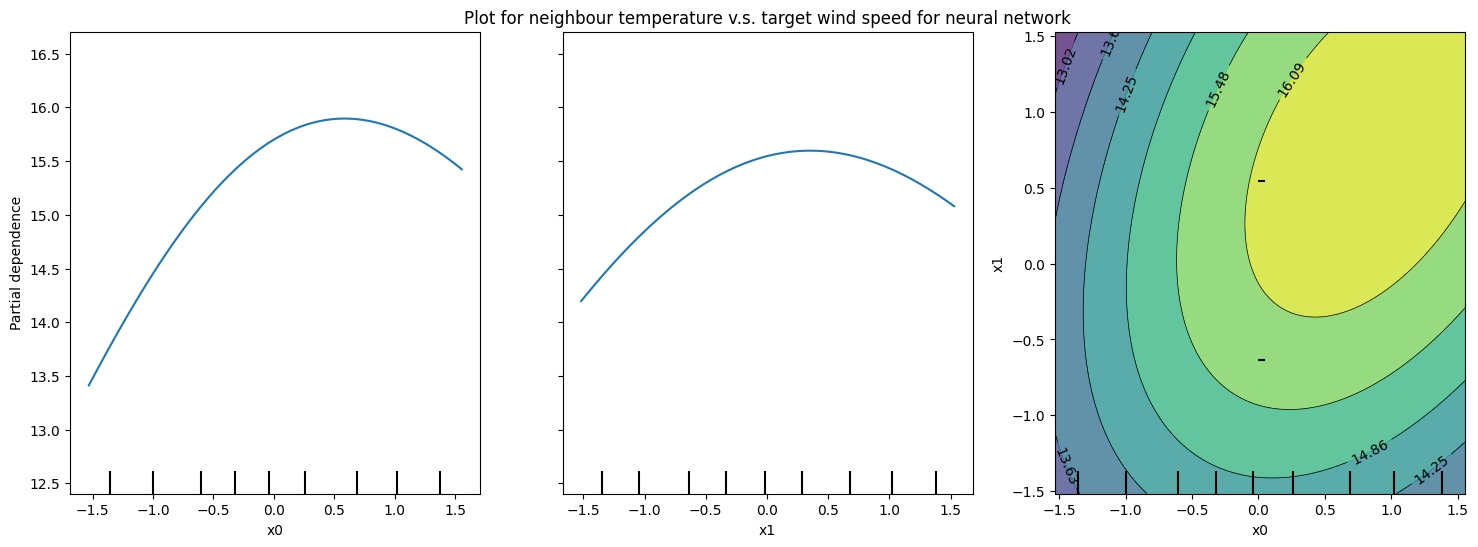

In [27]:
# Plot temp vs wnd speed
# Select features to plot
x = plot_data[['2','8']][0:1000]
x = x.rename(columns={'2': 'Neighbour1 temperature', '9': 'Neighbour2 temperature'})
y= plot_data_y[0:1000]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour temperature v.s. target wind speed", 'linear')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour temperature v.s. target wind speed", 'ts')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour temperature v.s. target wind speed", 'nn')

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 1)

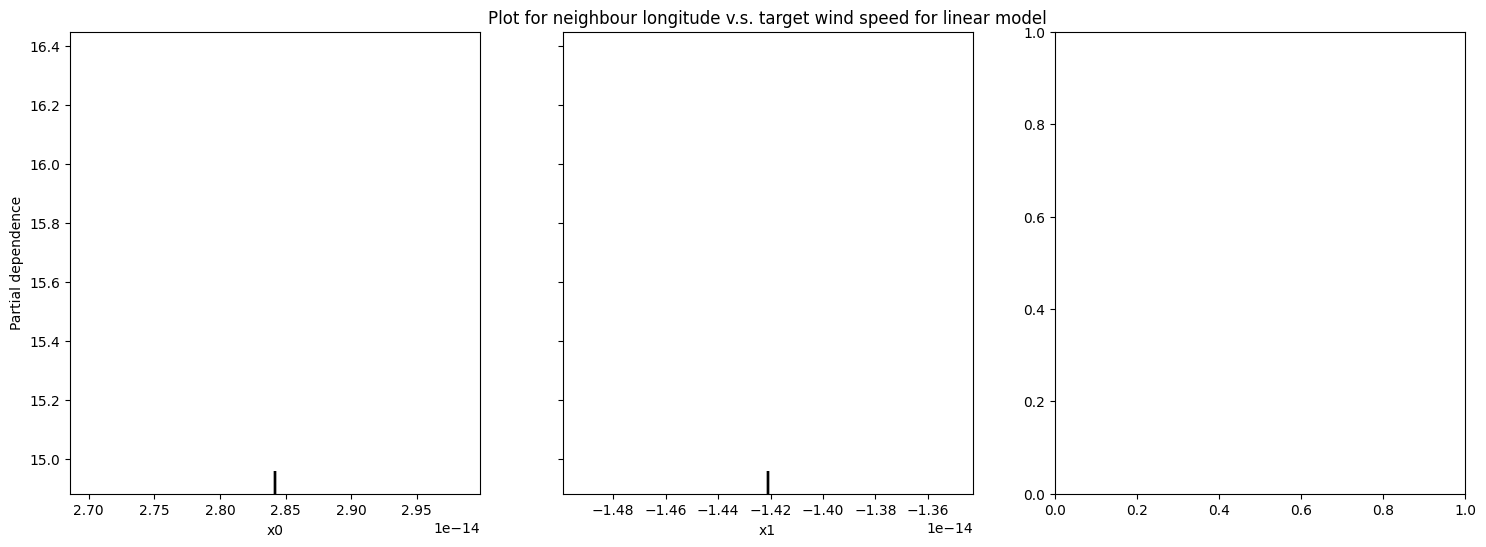

In [30]:
# Plot temp vs wnd speed
# Select features to plot
x = plot_data[['1','7']][0:1000]
x = x.rename(columns={'1': 'Neighbour1 longitude', '7': 'Neighbour2 longitude'})
y= plot_data_y[0:1000]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour longitude v.s. target wind speed", 'linear')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour longitude v.s. target wind speed", 'ts')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour longitude v.s. target wind speed", 'nn')

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 1)

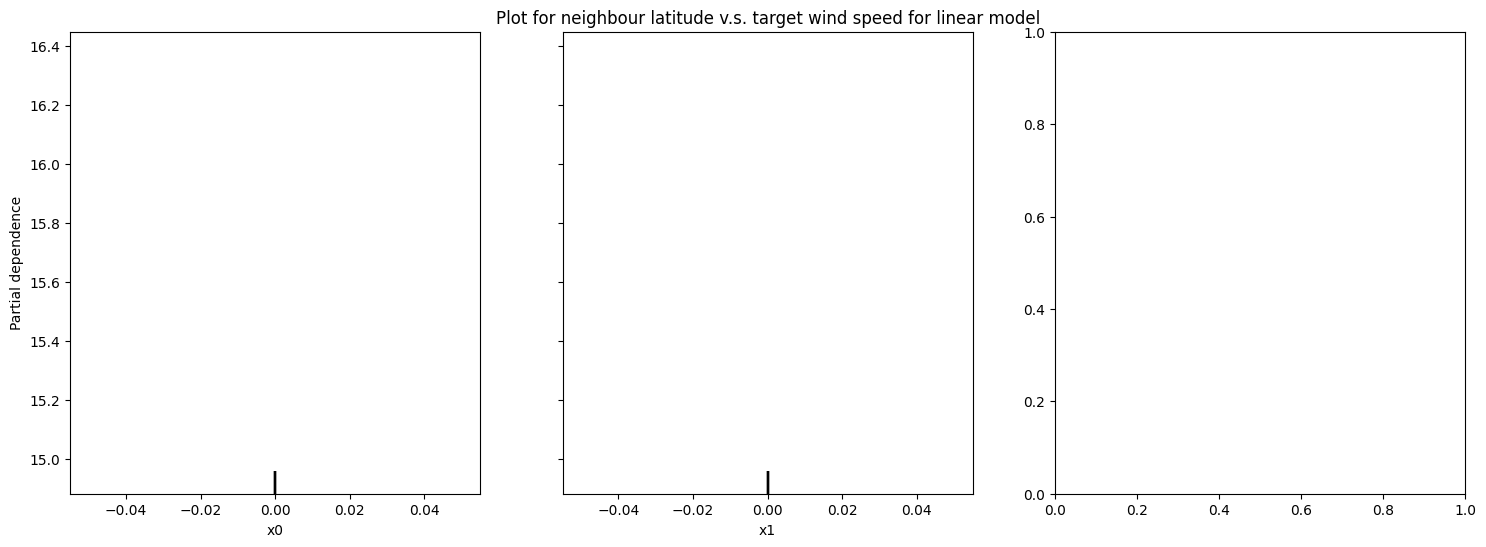

In [31]:
# Plot temp vs wnd speed
# Select features to plot
x = plot_data[['0','6']][0:1000]
x = x.rename(columns={'0': 'Neighbour1 latitude', '6': 'Neighbour2 latitude'})
y= plot_data_y[0:1000]

scaler = StandardScaler()
x = scaler.fit_transform(x)

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour latitude v.s. target wind speed", 'linear')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour latitude v.s. target wind speed", 'ts')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour latitude v.s. target wind speed", 'nn')

In [3]:
#test_data = pd.read_csv('Data\processed_ab_no_precp_test.txt')
train_x = pd.read_csv('Data/exp/1102_no_precp_full_dataset/9x.csv', index_col=0)
train_y = pd.read_csv('Data/exp/1102_no_precp_full_dataset/9y.csv', index_col=0)

test_x = pd.read_csv('Data/exp/1102_no_precp_full_dataset/9x_test.csv', index_col=0)
test_y = pd.read_csv('Data/exp/1102_no_precp_full_dataset/9y_test.csv', index_col=0)

In [17]:
train_data = pd.read_csv('Data\processed_ab_no_precp_train.txt')

C:\Users\PPL\AppData\Local\Temp\ipykernel_8996\1797456061.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('Data\processed_ab_no_precp_train.txt')


In [52]:
train_data['wind_speed'].max()

111.0

In [49]:
test_data.loc[test_data['name']=='LETHBRIDGE CDA']['wind_speed'].unique()

array([11., 13.,  7., 15.,  9., 24., 17., 20.,  4., 33., 37., 35.,  6.,
       30., 19., 22., 32., 28., 39., 48., 46., 43., 41., 26., 44., 59.,
       50., 63., 61., 54., 14., 12., 10., 42.,  8., 55., 36., 25., 45.,
       49., 29., 34., 23., 21., 16., 40., 31., 18.,  3.,  5., 38., 64.,
       52., 27., 47., 51., 58., 53., 57., 56.,  2., 60.])

In [6]:
# First train the model on the entire training data

# Try different learning rate
# activation function
# try a small NN network
neural_network_model = build_neural_network_model()

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

neural_network_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = neural_network_model.fit(
    train_x, 
    train_y, 
    epochs=50, 
    shuffle=True
)

Epoch 1/50
16697/16697 [==============================] - 40s 2ms/step - loss: 41.0802 - root_mean_squared_error: 6.4094
Epoch 2/50
16697/16697 [==============================] - 39s 2ms/step - loss: 31.1837 - root_mean_squared_error: 5.5842
Epoch 3/50
16697/16697 [==============================] - 39s 2ms/step - loss: 30.5925 - root_mean_squared_error: 5.5310
Epoch 4/50
16697/16697 [==============================] - 39s 2ms/step - loss: 30.2784 - root_mean_squared_error: 5.5026
Epoch 5/50
16697/16697 [==============================] - 38s 2ms/step - loss: 30.0854 - root_mean_squared_error: 5.4850
Epoch 6/50
16697/16697 [==============================] - 39s 2ms/step - loss: 29.9662 - root_mean_squared_error: 5.4741
Epoch 7/50
16697/16697 [==============================] - 38s 2ms/step - loss: 29.8470 - root_mean_squared_error: 5.4632
Epoch 8/50
16697/16697 [==============================] - 39s 2ms/step - loss: 29.7749 - root_mean_squared_error: 5.4566
Epoch 9/50
16697/16697 [========

In [9]:
test_x = scaler.transform(test_x)

In [6]:
# All stations in the dataset
stations_to_test = [
    'LETHBRIDGE CDA',                 
    'EDMONTON STONY PLAIN CS',        
    'CORONATION CLIMATE',             
    'STRATHMORE AGDM',                
    'LLOYDMINSTER',                  
    'MEDICINE HAT RCS',             
    'MILK RIVER',                     
    'CAMROSE',                     
    'BROOKS',                    
    'CLARESHOLM',           
    'ONEFOUR CDA',            
    'VEGREVILLE',             
    'ROCKY MTN HOUSE (AUT)',         
    'LACOMBE CDA 2',              
    'BANFF CS',                     
    'DRUMHELLER EAST',         
    'MEDICINE HAT',                 
    'LETHBRIDGE',                 
    'EDMONTON INTL A',         
    'CALGARY INTL A'
]

In [7]:
def plot_prediction_error(y, y_prediction, station_name, axis_limit, axis):
    rmse = np.round(mean_squared_error(y, y_prediction, squared=False),4)

    axis.set_ylim(0,axis_limit)
    axis.set_xlim(0,axis_limit)
    axis.plot([0, axis_limit], [0, axis_limit], 'k--')
    axis.plot(y, y_prediction, 'ro', alpha=.2, label=f"RMSE for station = {rmse}")
    axis.legend(loc="upper left")
    axis.set_title(f"True v.s. predicted wind speed for \n {station_name}", wrap=True)

In [8]:
def plot_train_test_prediction_error(train_y, train_prediction, test_y, test_prediction, station_name):
    axis_limit = np.max([np.max(np.array(train_y).flatten()), np.max(np.array(test_y).flatten())])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
    
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    plot_prediction_error(train_y, train_prediction, station_name +' on training data', axis_limit, ax1)
    plot_prediction_error(test_y, test_prediction, station_name +' on testing data', axis_limit, ax2)    
    
    plt.show()

In [9]:
plt.rcParams.update({'font.size': 18})

In [11]:
# plots for training data
train_prediction_per_stations = {}

for station in stations_to_test:
#     features, target = Data_utils.generate_data(
#         train_data, 
#         station, 
#         9, 
#         100000, 
#         0
#     )
#     x = np.array(features)
#     x = scaler.transform(x)
#     y = np.array(target)
    
#     temp_x = pd.DataFrame(x)
#     temp_x.to_csv(f"Data/visualization_data/{station}_x.csv")
#     temp_y = pd.DataFrame(y)
#     temp_y.to_csv(f"Data/visualization_data/{station}_y.csv")
    
    #train_x = pd.read_csv(f"Data/visualization_data/{station}_x.csv", index_col=0)
    #train_y = pd.read_csv(f"Data/visualization_data/{station}_y.csv", index_col=0)

    #train_prediction = np.array(neural_network_model.predict(train_x)).flatten()

    features, target = Data_utils.generate_data(
        test_data, 
        station, 
        9, 
        100000, 
        0
    )
    test_x = np.array(features)
    test_x = scaler.transform(test_x)
    test_y = np.array(target)

    test_prediction = np.array(neural_network_model.predict(test_x)).flatten()
    
    #plot_train_test_prediction_error(train_y, train_prediction, test_y, test_prediction, station)
    
    # Record the RMSE
    train_prediction_per_stations[station] = np.round(mean_squared_error(test_y, test_prediction, squared=False),4)

172/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


171/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


206/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


171/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


187/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


200/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


177/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


218/358 [=================>............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


171/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


153/358 [===========>..................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


165/358 [============>.................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


168/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


161/358 [============>.................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


175/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


173/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


176/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


151/358 [===========>..................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


189/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


190/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


196/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 697us/step


In [12]:
train_prediction_per_stations

{'LETHBRIDGE CDA': 4.881,
 'EDMONTON STONY PLAIN CS': 3.8545,
 'CORONATION CLIMATE': 5.5071,
 'STRATHMORE AGDM': 5.2967,
 'LLOYDMINSTER': 6.1567,
 'MEDICINE HAT RCS': 3.7104,
 'MILK RIVER': 7.096,
 'CAMROSE': 4.2746,
 'BROOKS': 5.2531,
 'CLARESHOLM': 6.8771,
 'ONEFOUR CDA': 8.056,
 'VEGREVILLE': 4.6378,
 'ROCKY MTN HOUSE (AUT)': 4.8587,
 'LACOMBE CDA 2': 4.4527,
 'BANFF CS': 4.018,
 'DRUMHELLER EAST': 4.7685,
 'MEDICINE HAT': 4.6794,
 'LETHBRIDGE': 6.1632,
 'EDMONTON INTL A': 4.8375,
 'CALGARY INTL A': 6.4294}

181/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 760us/step


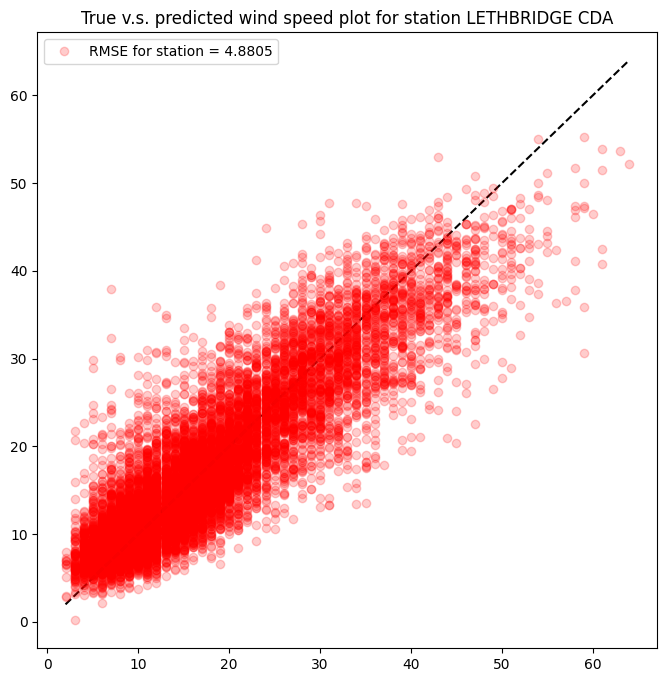

177/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 840us/step


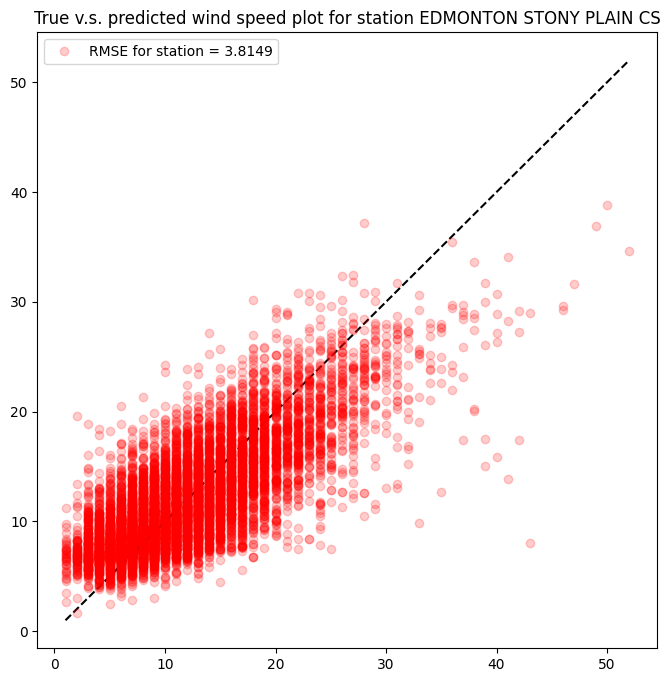

205/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 681us/step


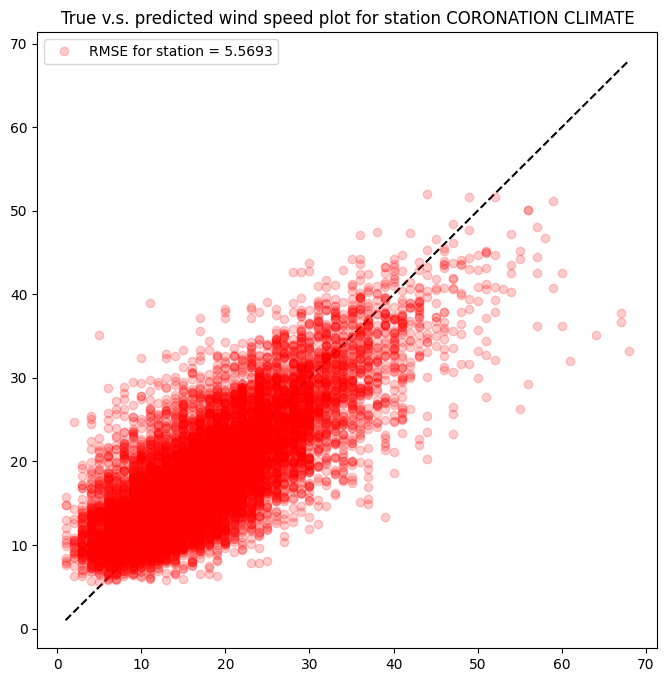

196/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 747us/step


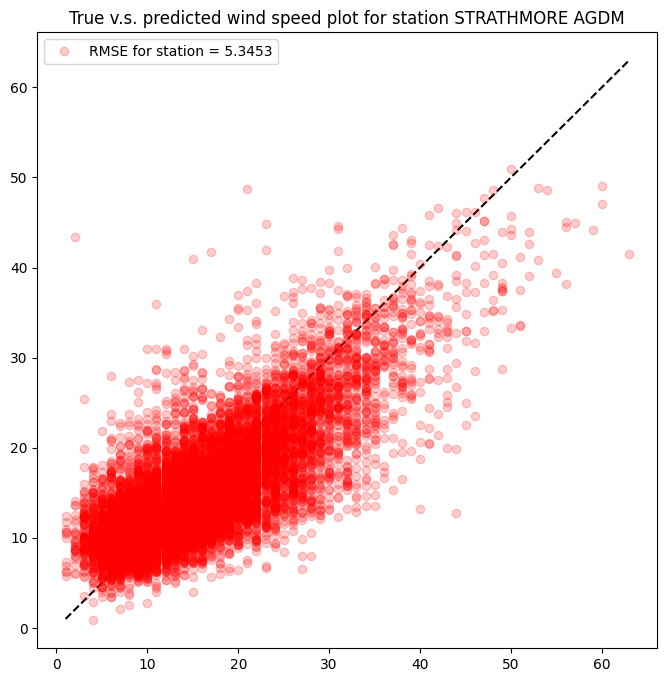

191/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 755us/step


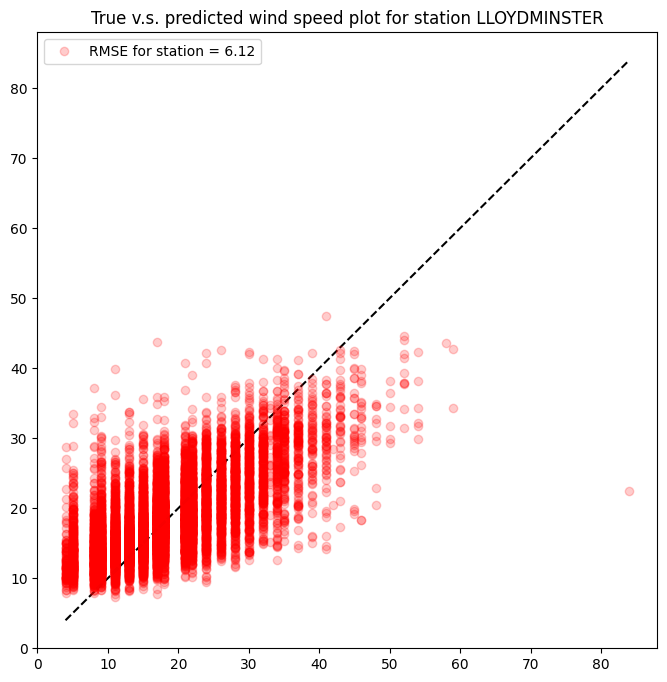

240/358 [===================>..........] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 604us/step


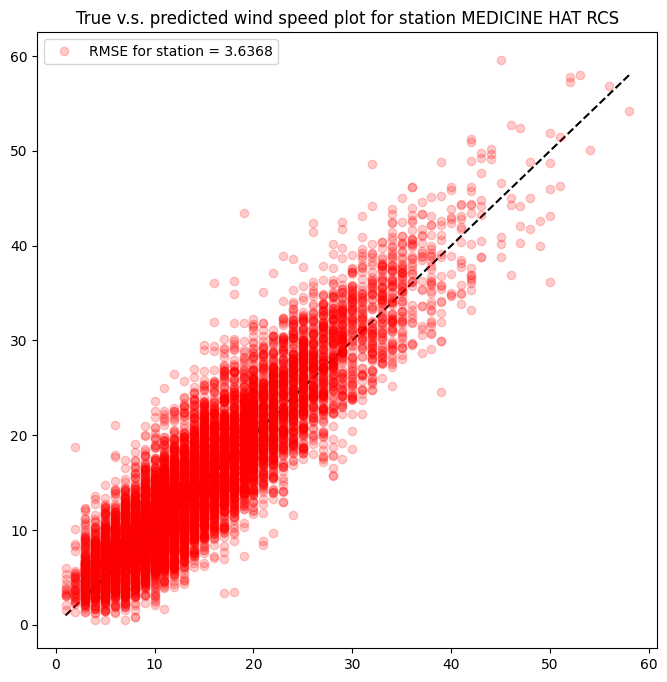

195/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 782us/step


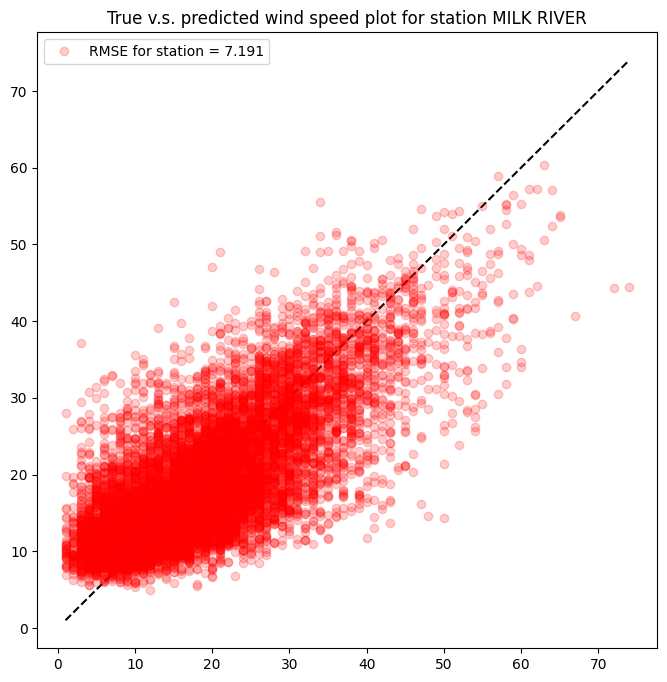

200/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 747us/step


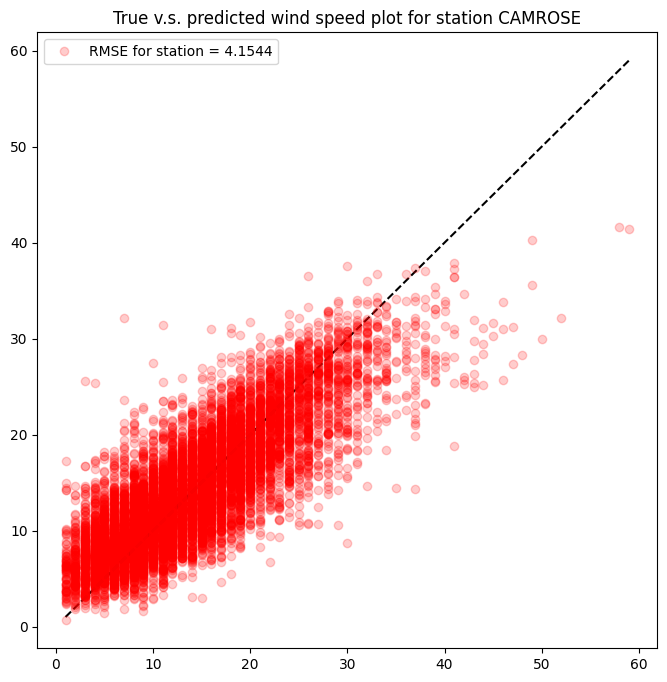

190/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 801us/step


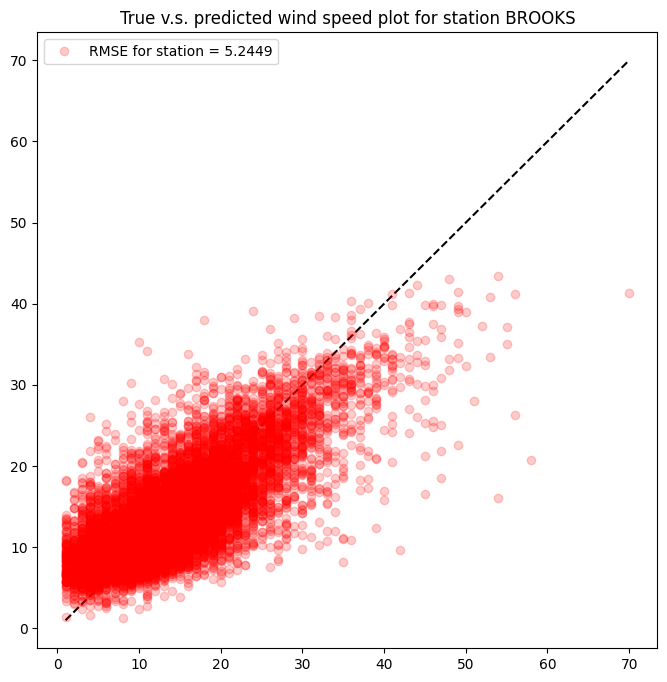

182/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 755us/step


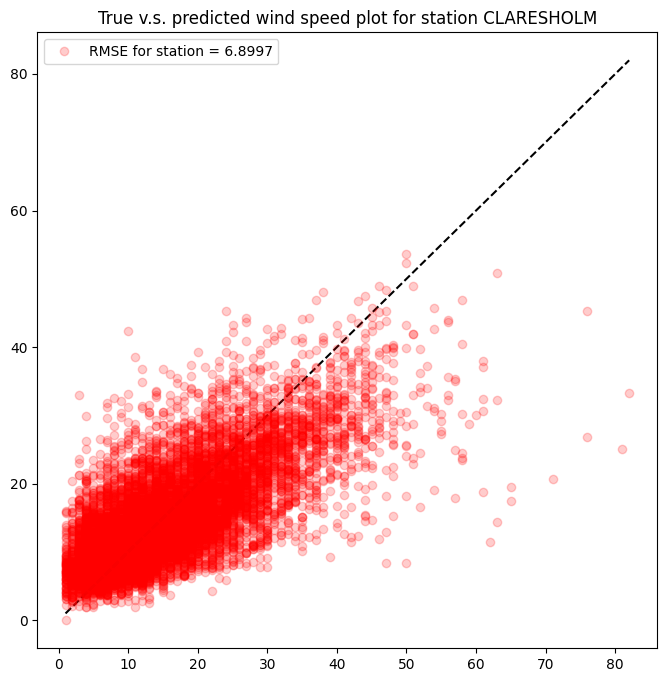

185/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 781us/step


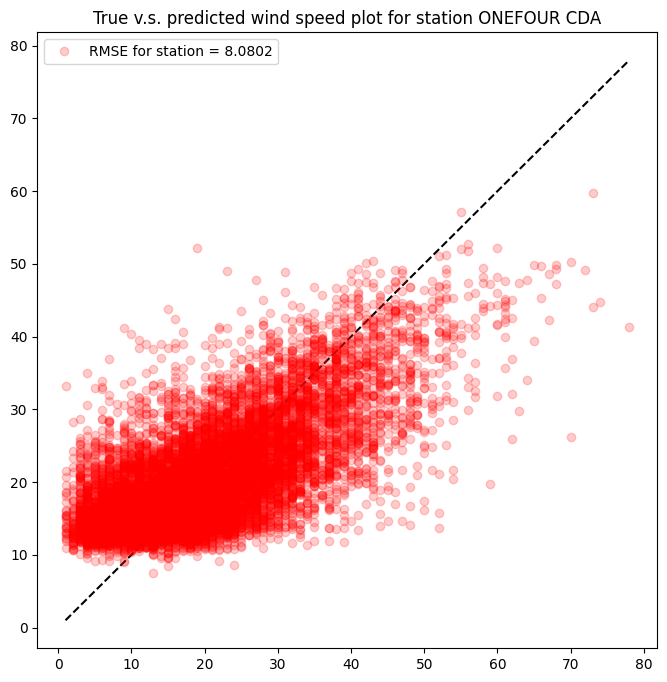

181/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 849us/step


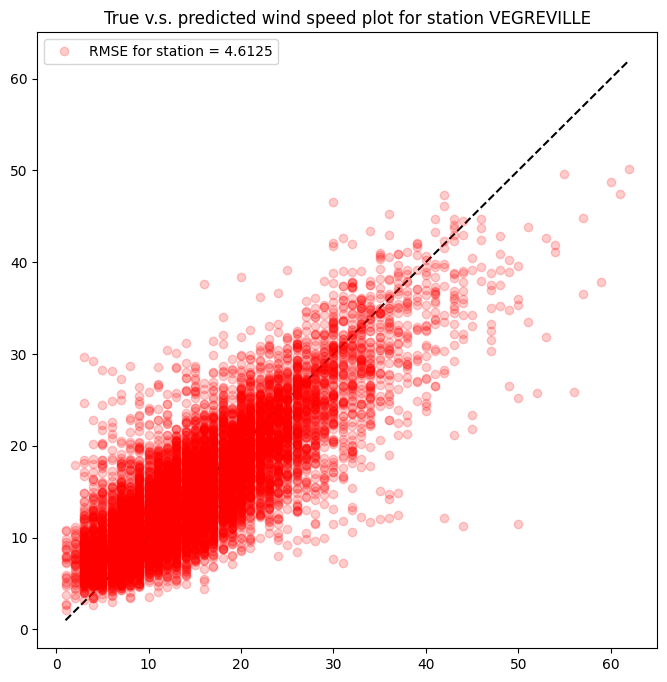

209/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 687us/step


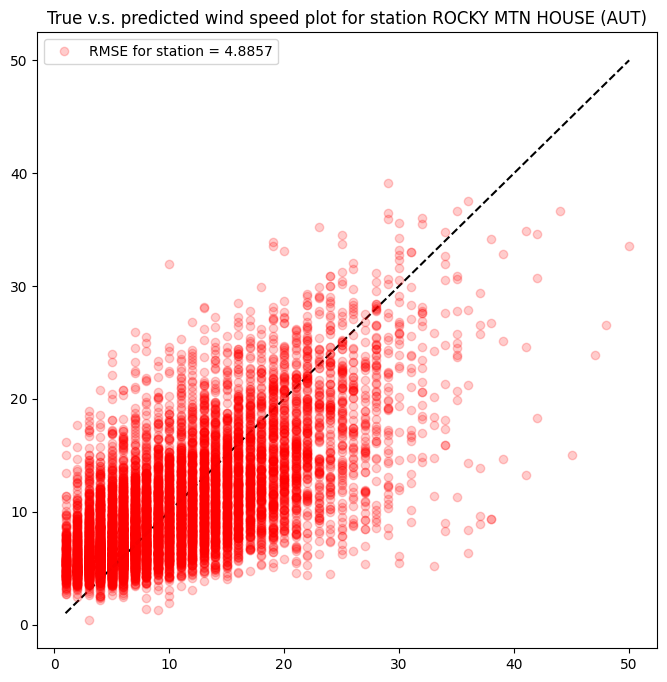

203/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 663us/step


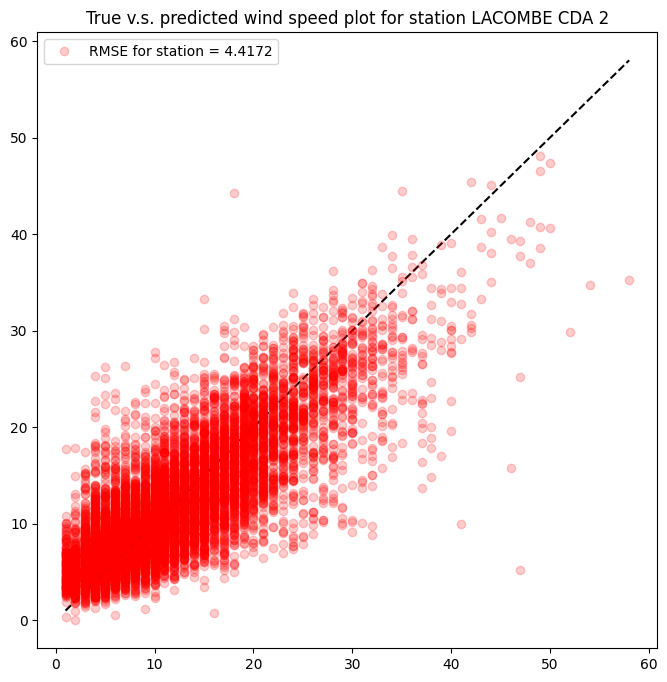

239/358 [===================>..........] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 605us/step


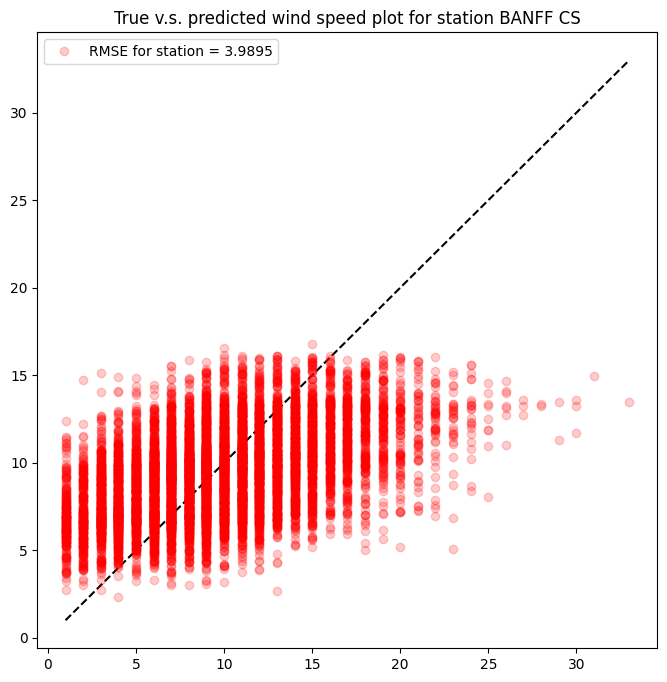

193/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 791us/step


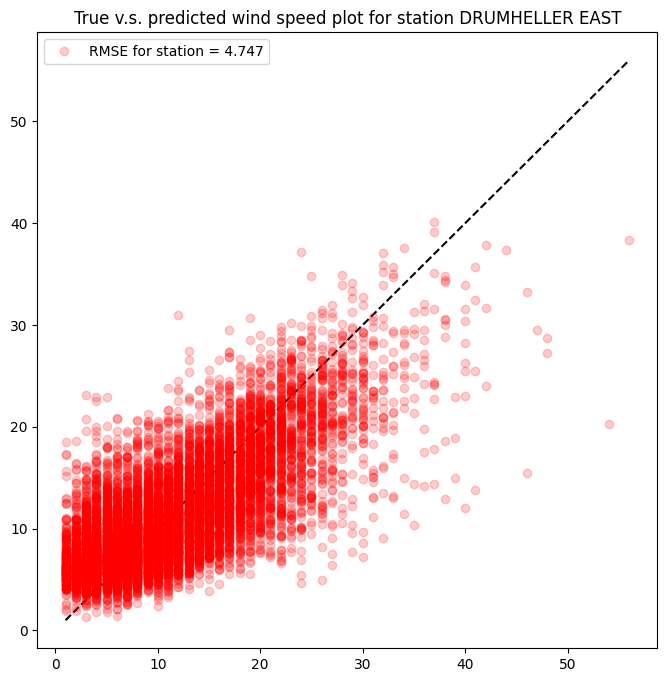

199/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 736us/step


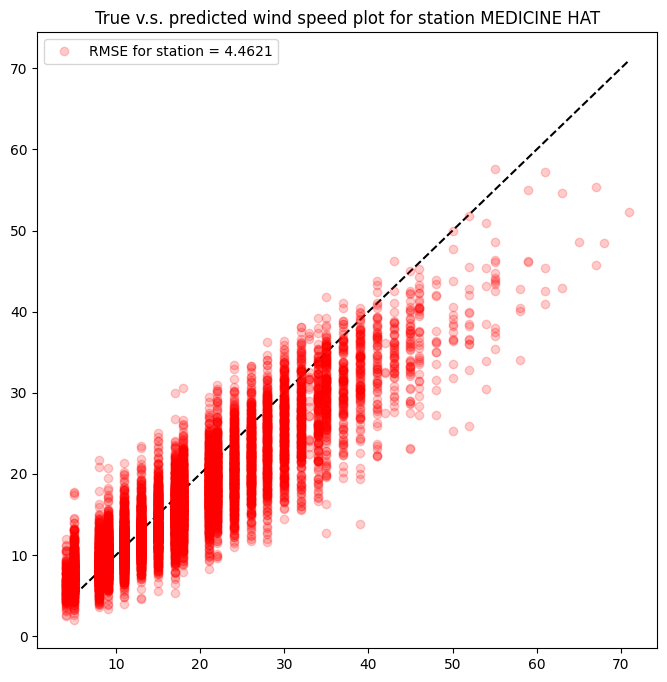

192/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 804us/step


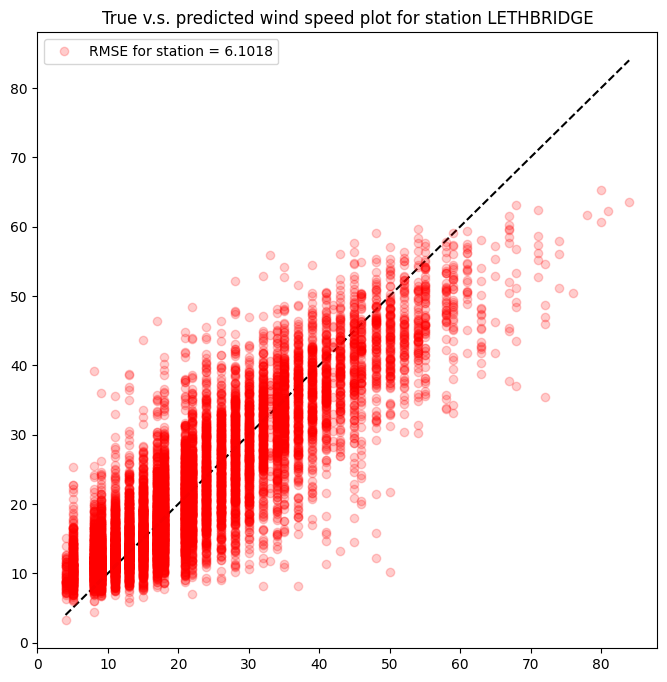

209/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 662us/step


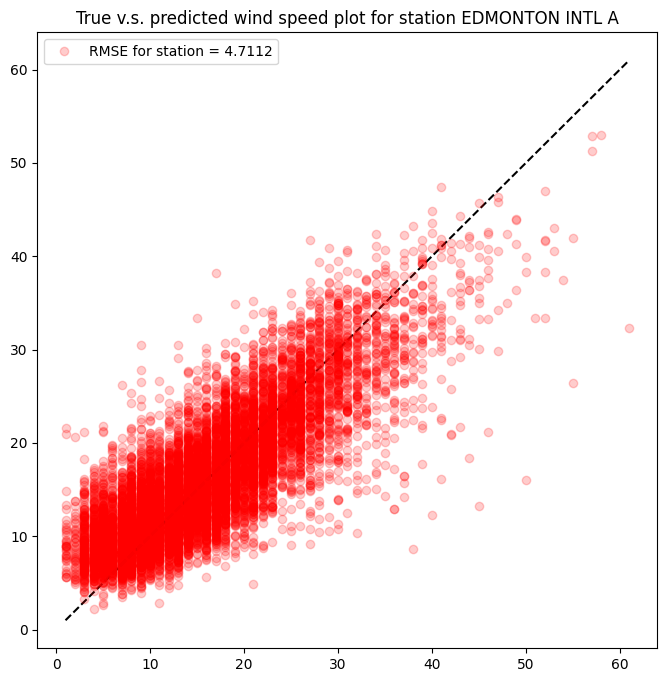

190/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 759us/step


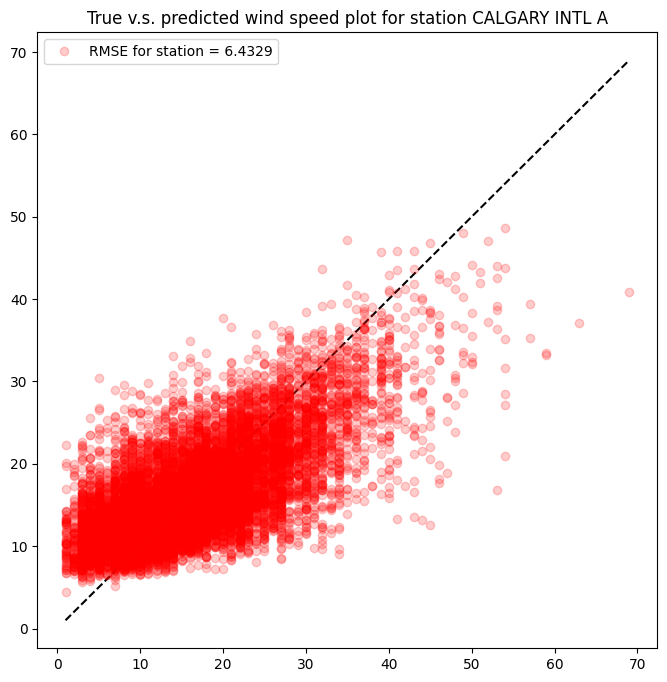

In [25]:
# plots for testing data
prediction_per_stations = []
test_x = []
test_y = []

for station in stations_to_test:
    features, target = Data_utils.generate_data(
        test_data, 
        station, 
        9, 
        100000, 
        0
    )
    x = np.array(features)
    x = scaler.transform(x)
    y = np.array(target)
    
    test_x.append(x)
    test_y.append(y)
    prediction = np.array(neural_network_model.predict(x)).flatten()
    
    plot_prediction_error(y, prediction, station)
    
    prediction_per_stations.append({station : prediction})

In [12]:
test_x = np.array(test_x)
#test_x = test_x.reshape(-1, test_x.shape[-1])
test_y = np.array(test_y)
test_y = test_y.flatten()

In [13]:
test_y

array([19.,  6.,  6., ...,  9., 11.,  2.])

In [7]:
predict_test = neural_network_model.evaluate(test_x, test_y)

7157/7157 [==============================] - 13s 2ms/step - loss: 173.1644 - root_mean_squared_error: 13.1592


In [14]:
predict_test = neural_network_model.predict(test_x)
r2 = r2_score(test_y, predict_test)
print(r2)

7157/7157 [==============================] - 8s 1ms/step
0.6648685535139794


In [15]:
reg = LinearRegression().fit(train_x, train_y)

test_pred = reg.predict(test_x)

r2 = r2_score(test_y, test_pred)
print(r2)

0.522275497761087


In [17]:
# Fcm hyperparameters
FCM_Nc = 30
FCM_m = 2
#tol = 1e-10
max_iter = 200

N = train_x.shape[0]
U = np.random.rand(N, FCM_Nc)
U = U / np.sum(U, axis=1, keepdims=True)
qs = []

# Fuzzy C-Means 聚类
for _ in range(max_iter):
    U_old = U.copy()
    mf = U ** FCM_m
    cen = np.dot(mf.T, train_x) / np.sum(mf, axis=0, keepdims=True).T
    dists = cdist(train_x, cen)
    tmp = np.power(dists, -2 / (FCM_m - 1))
    U = tmp / np.sum(tmp, axis=1, keepdims=True)

    q = np.sum((U ** FCM_m) * (dists ** 2))
    qs.append(q)

    # 检查是否收敛
#         if np.linalg.norm(U - U_old) < tol:
#             break
# 模型训练 find if this can be optimized
z = np.hstack((np.ones((N, 1)), train_x))
H = np.zeros((N, FCM_Nc * (train_x.shape[1] + 1)))

# 生成模糊规则矩阵 H
for j in range(FCM_Nc):
    Uj = np.tile(U[:, j], (train_x.shape[1] + 1, 1)).T
    H[:, (j * (train_x.shape[1] + 1)):((j + 1) * (train_x.shape[1] + 1))] = Uj * z

# 计算权重 W
W = pinv(np.dot(H.T, H)).dot(H.T).dot(train_y)

# 在训练集上进行预测
y_hat_train = np.dot(H, W)
mse_train = mean_squared_error(train_y, y_hat_train)
rmse_train = sqrt(mean_squared_error(train_y, y_hat_train))
print("FCM traning RMSE:", rmse_train)

# validation
N_validation = test_x.shape[0]
z_validation = np.hstack((np.ones((N_validation, 1)), test_x))
H_validation = np.zeros((N_validation, FCM_Nc * (test_x.shape[1] + 1)))
dists_validation = cdist(test_x, cen)
tmp_validation = np.power(dists_validation, -2 / (FCM_m - 1))
U_validation = tmp_validation / np.sum(tmp_validation, axis=1, keepdims=True)

# 生成模糊规则矩阵 H_test
for j in range(FCM_Nc):
    Uj_validation = np.tile(U_validation[:, j], (test_x.shape[1] + 1, 1)).T
    H_validation[:, (j * (test_x.shape[1] + 1)):((j + 1) * (test_x.shape[1] + 1))] = Uj_validation * z_validation

# validation set
y_hat_validation = np.dot(H_validation, W)
mse_validation = mean_squared_error(test_y, y_hat_validation)
rmse_validation = sqrt(mse_validation)
print("FCM val RMSE:", rmse_validation)

r2 = r2_score(test_y, y_hat_validation)
print(r2)

FCM traning RMSE: 6.451955717271967
FCM val RMSE: 6.455232666287418
0.5222790391547826
